In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

In [3]:
n = 8
n_q = 8
n_b = 8
qc_output = QuantumCircuit(n_q, n_b)

In [4]:
for j in range(n):
    qc_output.measure(j,j)

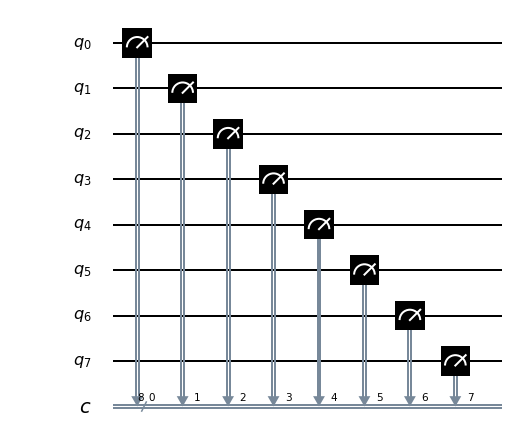

In [5]:
qc_output.draw(output='mpl')

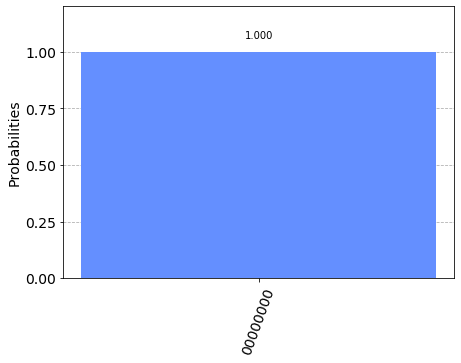

In [9]:
counts = execute(qc_output, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

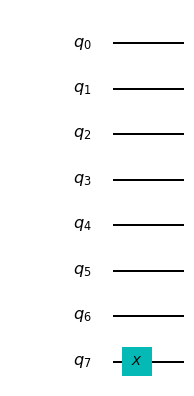

In [10]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7)
qc_encode.draw(output='mpl')

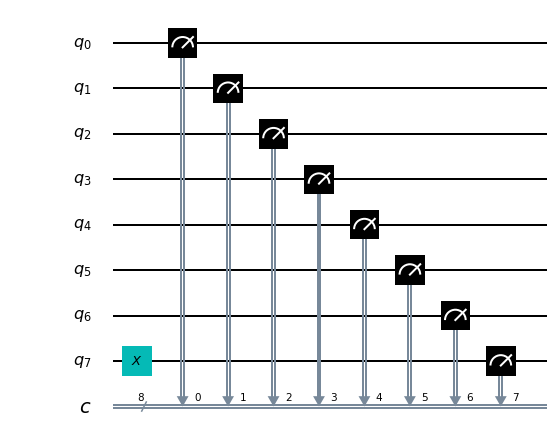

In [11]:
qc = qc_encode + qc_output
qc.draw(output='mpl', justify='none')

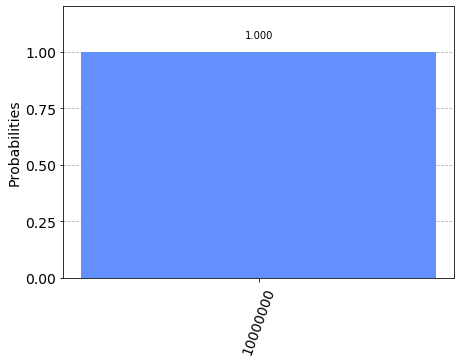

In [14]:
counts = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

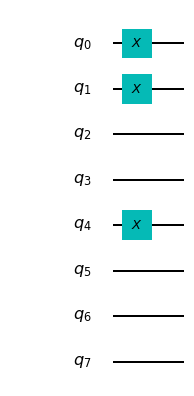

In [16]:
qc_encode = QuantumCircuit(n)
qc_encode.x(4)
qc_encode.x(1)
qc_encode.x(0)

qc_encode.draw(output='mpl')

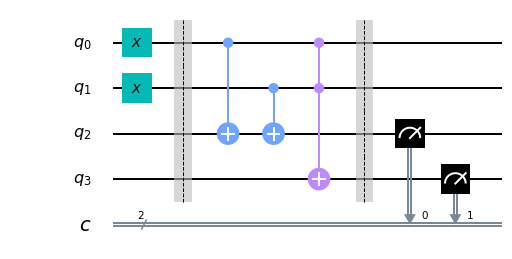

In [20]:
qc_ha = QuantumCircuit(4,2)

qc_ha.x(0)
qc_ha.x(1)

qc_ha.barrier()
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.ccx(0,1,3)
qc_ha.barrier()

qc_ha.measure(2,0)
qc_ha.measure(3,1)

qc_ha.draw(output='mpl')

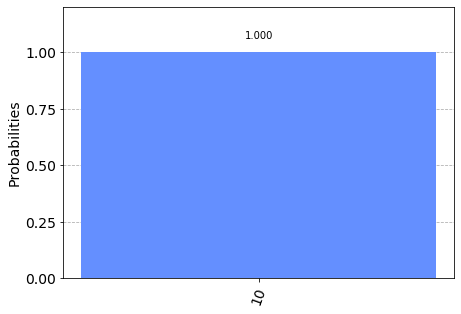

In [22]:
counts = execute(qc_ha,Aer.get_backend("qasm_simulator")).result().get_counts()
plot_histogram(counts)

In [23]:
from qiskit import QuantumCircuit, execute
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [24]:
%config InlineBackend.figure_format = 'svg'

In [25]:
qc = QuantumCircuit(1) #1 qubit circuit

In [30]:
from qiskit.extensions import Initialize
initial_state = [0,1] #set initial state to |1>
init_op = Initialize(initial_state)
qc.append(init_op, [0])
qc.draw()

┌─────────────────┐
q_0: |0>┤ Initialize(0,1) ├
        └─────────────────┘

In [31]:
backend = Aer.get_backend('statevector_simulator')

In [35]:
result = execute(qc, backend).result()


In [36]:
out_state = result.get_statevector()
print(out_state)

[0.+0.j 1.+0.j]


In [37]:
qc.measure_all()
qc.draw()

┌─────────────────┐ ░ ┌─┐
     q_0: |0>┤ Initialize(0,1) ├─░─┤M├
             └─────────────────┘ ░ └╥┘
measure_0: 0 ═══════════════════════╩═

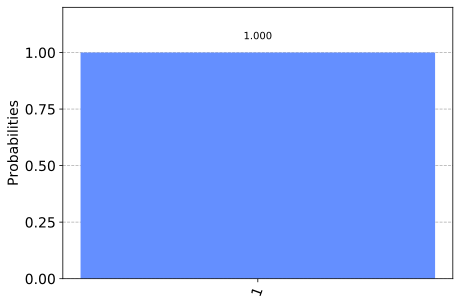

In [38]:
result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)

In [39]:
initial_state = [1/sqrt(2), complex(0, 1/sqrt(2))]

In [41]:
qc = QuantumCircuit(1)
init_op = Initialize(initial_state)
qc.append(init_op, [0])
state = execute(qc,backend).result().get_statevector()
print(state)

[0.70710678+0.j         0.        +0.70710678j]


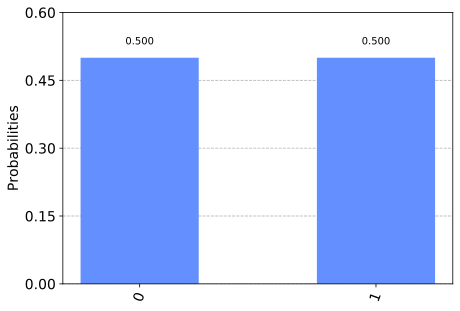

In [42]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

In [43]:
qc = QuantumCircuit(1)
initial_state = [1/sqrt(2), complex(0, 1/sqrt(2))]
init_state = Initialize(initial_state)
qc.append(init_state, [0])
qc.draw()

┌──────────────────────────────┐
q_0: |0>┤ Initialize(0.70711,0.70711j) ├
        └──────────────────────────────┘

In [44]:
qc.measure_all()
qc.draw()

┌──────────────────────────────┐ ░ ┌─┐
     q_0: |0>┤ Initialize(0.70711,0.70711j) ├─░─┤M├
             └──────────────────────────────┘ ░ └╥┘
measure_0: 0 ════════════════════════════════════╩═

In [45]:
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_multivector
%config InlineBackend.figure_format = 'svg'

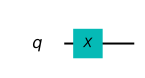

In [46]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

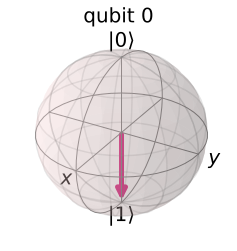

In [47]:
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

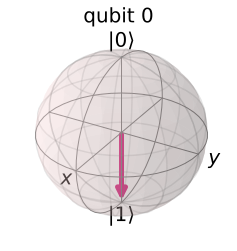

In [48]:
qc = QuantumCircuit(1)
qc.y(0)
qc.draw('mpl')
out = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out)

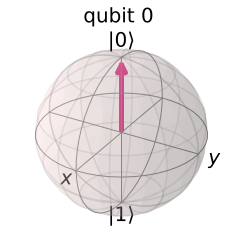

In [50]:
qc = QuantumCircuit(1)
qc.z(0)
qc.draw('mpl')
out = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out)

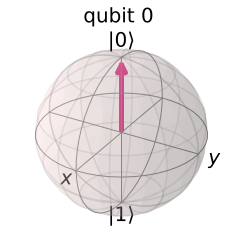

In [51]:
qc = QuantumCircuit(1)
qc.x(0)
qc.y(0)
qc.z(0)
qc.draw('mpl')
out = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out)

In [85]:
qc = QuantumCircuit(1, 1)
initial_state = [1,0]
init_state = Initialize(initial_state)
qc.append(init_state, [0])

qc.h(0)
qc.measure(0,0)

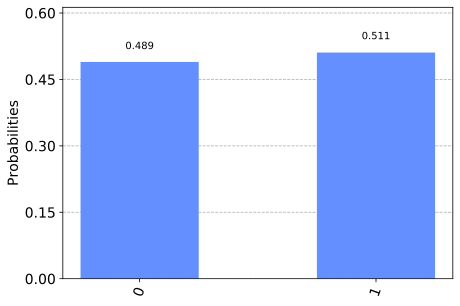

In [87]:
counts = execute(qc, Aer.get_backend('qasm_simulator'), shots=8192).result().get_counts()
plot_histogram(counts)

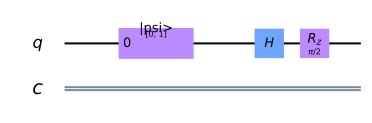

In [94]:
qc = QuantumCircuit(1, 1)
initial_state = [0,1]
init_state = Initialize(initial_state)
qc.append(init_state, [0])

qc.h(0)
qc.rz(pi/2,0)
qc.draw(output='mpl')

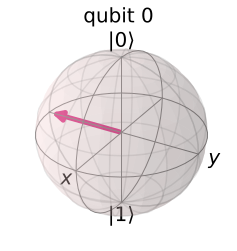

In [95]:
out_state = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out_state)